# 📈 Análise do Novo Bolsa Família - Brasil

Este projeto visa analisar os dados do **Novo Bolsa Família**, um programa de transferência de renda do Governo Federal reformulado em 2023. O foco está em entender a distribuição dos valores pagos, sua variação ao longo do tempo e o impacto em diferentes regiões do Brasil.

---

## 🎯 Objetivos
- Analisar a **distribuição dos valores** ao longo dos meses.
- Estudar a **variação estatística** dos repasses.
- Explorar **diferenças regionais** por meio de dados geográficos.
- Gerar **insights relevantes** para políticas públicas.

---

## 🛠️ Tecnologias Utilizadas
- **Python** (Pandas, NumPy, SQLite, GeoPandas, Seaborn, Matplotlib)
- **Banco de Dados SQLite**
- **Mapas do IBGE (Shapefiles)**


## 📦 Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import geobr

# Configurações padrão de visualização
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## 🗃️ Leitura dos Dados

In [10]:
# Conexão com banco de dados local SQLite
conexao = sqlite3.connect('bolsa_familia.db')
df_historico = pd.read_sql('SELECT * FROM bolsa_familia_consolidado', conexao)
df_historico.head()

,mes_competencia,qtd_pessoas,valor_parcela_mi,media_valor_parcela,desvio_padrao_valor_parcela,data_formatada
0,202303,20419605,13159.28,644.0,120.0,2023-03-01
1,202304,20092338,12938.49,644.0,123.0,2023-04-01
2,202305,20356776,13098.36,643.0,124.0,2023-05-01
3,202306,20699443,14115.74,682.0,166.0,2023-06-01
4,202307,20223944,13277.28,657.0,182.0,2023-07-01


## 🔧 Pré-processamento e Limpeza

In [11]:
df_historico['data_formatada'] = pd.to_datetime(df_historico['data_formatada'])
df_historico.columns = ['mes_competencia','qtd_parcelas','valor_parcela_mi','media_parcela','desvio_padrao','data']
df_historico['ano'] = df_historico['data'].dt.year
df_historico.head()

,mes_competencia,qtd_parcelas,valor_parcela_mi,media_parcela,desvio_padrao,data,ano
0,202303,20419605,13159.28,644.0,120.0,2023-03-01,2023
1,202304,20092338,12938.49,644.0,123.0,2023-04-01,2023
2,202305,20356776,13098.36,643.0,124.0,2023-05-01,2023
3,202306,20699443,14115.74,682.0,166.0,2023-06-01,2023
4,202307,20223944,13277.28,657.0,182.0,2023-07-01,2023


## 📊 Análise Estatística dos Valores Transferidos

In [13]:
media = df_historico['valor_parcela_mi'].mean() * 1_000_000
desvio = df_historico['valor_parcela_mi'].std() * 1_000_000
print(f"Média dos valores transferidos: R$ {media:,.2f}")
print(f"Desvio padrão: R$ {desvio:,.2f}")


Média dos valores transferidos: R$ 13,556,777,500.00
Desvio padrão: R$ 274,901,719.41


c:\Users\alext\Anac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


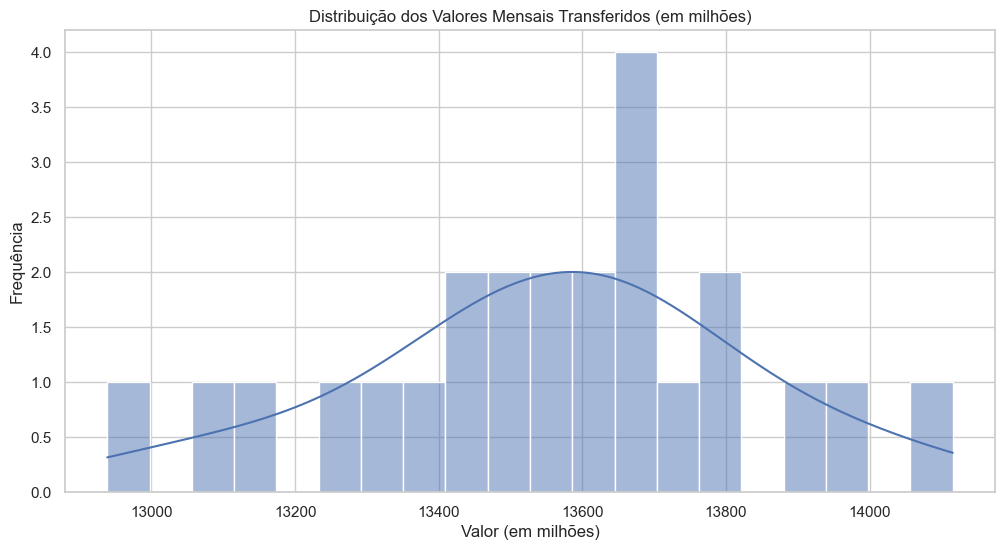

In [92]:
# Histograma
sns.histplot(df_historico['valor_parcela_mi'], bins=20, kde=True)
plt.title('Distribuição dos Valores Mensais Transferidos (em milhões)')
plt.xlabel('Valor (em milhões)')
plt.ylabel('Frequência')
plt.show()

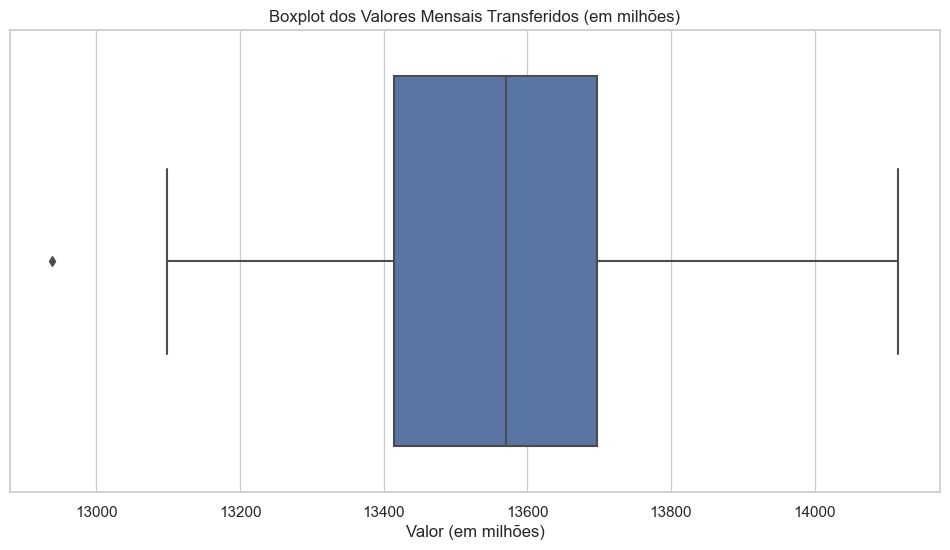

In [ ]:
# Boxplot
sns.boxplot(x=df_historico['valor_parcela_mi'])
plt.title('Boxplot dos Valores Mensais Transferidos (em milhões)')
plt.xlabel('Valor (em milhões)')
plt.show()

### 💡 Insight:
A distribuição dos valores pagos pelo programa é aproximadamente simétrica e estável, com poucas variações abruptas. O desvio padrão baixo indica uma política de repasses consistente e previsível ao longo do tempo.


## 🕒 Evolução dos Valores ao Longo do Tempo

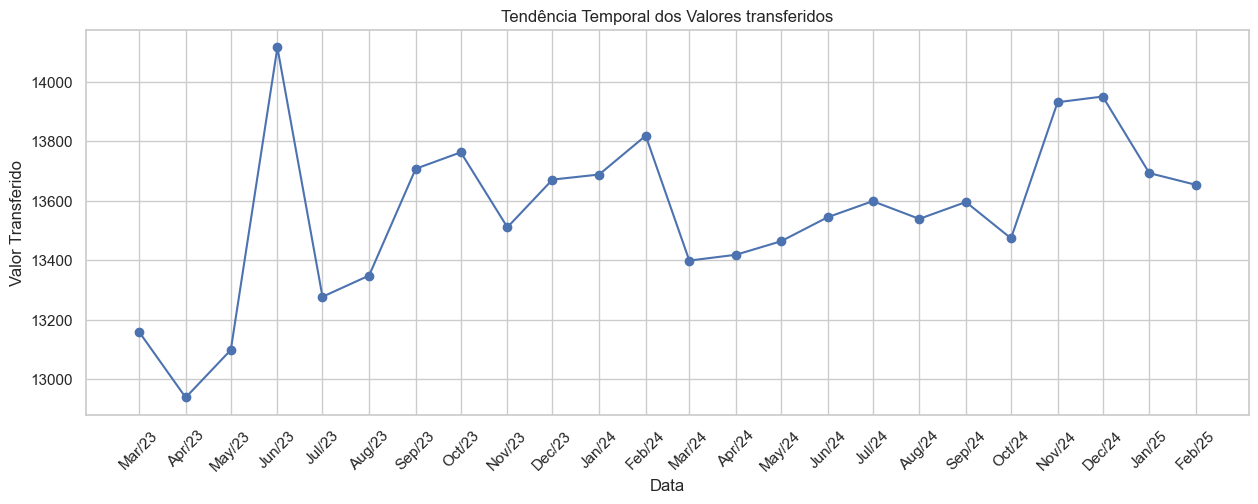

In [19]:
# plotando linha do tempo dos valores transferidos
date_format = mdates.DateFormatter('%b/%y')

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df_historico.data, df_historico.valor_parcela_mi, marker = 'o')
ax.set_title('Tendência Temporal dos Valores transferidos')
ax.set_xticks(df_historico.data)
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Data')
ax.set_ylabel('Valor Transferido')
ax.grid(True)
plt.show()

### 💡 Insight:
A curva revela um aumento significativo nos repasses a partir de junho de 2023, com estabilidade relativa ao longo de 2024. Destaques em novembro e dezembro de 2024 podem estar relacionados a reforços de fim de ano ou reajustes estratégicos. O comportamento indica planejamento cíclico e previsível.


In [21]:
# total transferido pelo programa de mar/2023 até fev/2025
total = (df_historico.valor_parcela_mi.sum())/1000
total_formatado = f'{total:,.0f}'.replace(',', 'v').replace('.', ',').replace('v', '.')
print(f'Total transferido pelo programa social novo bolsa família no período de mar/2023 até 02/2025 é de R$ {total_formatado} bilhões.')

Total transferido pelo programa social novo bolsa família no período de mar/2023 até 02/2025 é de R$ 325 bilhões.


## Variação percentual mês a mês

In [23]:
# incluindo uma coluna percentual mês a mês
df_historico['variacao_percentual'] = df_historico.valor_parcela_mi.pct_change()*100
df_historico.head(3)

,mes_competencia,qtd_parcelas,valor_parcela_mi,media_parcela,desvio_padrao,data,ano,variacao_percentual
0,202303,20419605,13159.28,644.0,120.0,2023-03-01,2023,NaN
1,202304,20092338,12938.49,644.0,123.0,2023-04-01,2023,-1.677827
2,202305,20356776,13098.36,643.0,124.0,2023-05-01,2023,1.235616


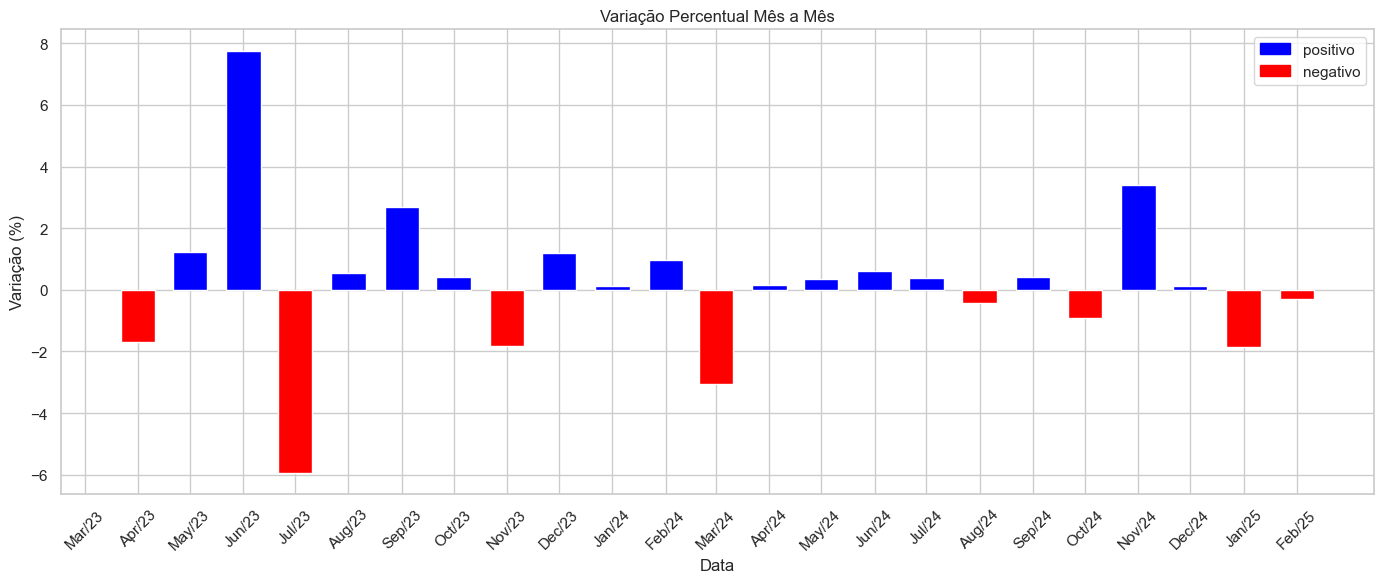

In [26]:
# plotando um gráfico de barras com a varaiação percentual mês a mês

cores = ['blue' if x >= 0 else 'red' for x in df_historico['variacao_percentual']]

date_format = mdates.DateFormatter('%b/%y')

plt.figure(figsize=(14, 6))
bars = plt.bar(df_historico['data'], df_historico['variacao_percentual'], color=cores,width=20)
plt.title('Variação Percentual Mês a Mês')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.grid(True, axis='y')

plt.gca().set_xticks(df_historico['data'])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

legenda_positiva = mpatches.Patch(color='blue', label='positivo')
legenda_negativa = mpatches.Patch(color='red', label='negativo')
plt.legend(handles=[legenda_positiva, legenda_negativa])

plt.tight_layout()
plt.show()

In [27]:
# verficando quando teve a maior aumento e maior queda
df_var = df_historico.dropna(subset=['variacao_percentual'])

pico = df_var.loc[df_var['variacao_percentual'].idxmax()]
fundo = df_var.loc[df_var['variacao_percentual'].idxmin()]

# variação de ponta a ponta

valor_inicio = df_var['variacao_percentual'].iloc[0]
valor_fim = df_var['variacao_percentual'].iloc[-1]

print(f"Maior aumento: {pico['data'].strftime('%b/%Y')} com {pico['variacao_percentual']:.1f}%")
print(f"Maior queda: {fundo['data'].strftime('%b/%Y')} com {fundo['variacao_percentual']:.1f}%")

Maior aumento: Jun/2023 com 7.8%
Maior queda: Jul/2023 com -5.9%


### 💡 Insight:
- Em jul/ago de 2023 ocorreu a regulamentação dos ***cadastros unipessoais*** feito pelo ministério do desevolvimento social, foi uma medida para ***limitar o número de pessoas sozinhas*** recebendo o Bolsa familia em cada município.
Essa mudança resultou em uma queda mais acentuada no número de beneficiários logo após sua implementação. O objetivo era coibir possíveis fraudes e garantir que o programa atendesse quem realmente precisa. Após essa correção inicial, as variações no número de beneficiários se tornaram mais suaves, indicando uma estabilização no fluxo de entrada e saída de pessoas do programa.

## Ranking de repasses por estado

In [28]:
# lendo base de dados do SQLite a tabela df_uf
df_uf = pd.read_sql('select * from bolsa_familia_uf_consolidado', conexao) # conexão
df_uf['data'] = pd.to_datetime(df_uf['data'],errors = 'coerce') # formatando a coluna data como datetime
df_uf['ano'] = df_uf['data'].dt.year # acrescentando a coluna ano
df_uf.head()

,mes_competencia,uf,qtd_parcelas,valor_parcela_mi,media_parcela,desvio_padrao,data,ano
0,202303,AC,125962,85.56,679.0,157.0,2023-03-01,2023
1,202303,AL,526714,339.71,645.0,121.0,2023-03-01,2023
2,202303,AM,599464,403.95,674.0,141.0,2023-03-01,2023
3,202303,AP,120648,79.99,663.0,134.0,2023-03-01,2023
4,202303,BA,2488214,1574.64,633.0,110.0,2023-03-01,2023


In [30]:
# criando uma tabela de ranking em ordem descrecente do Estados
ranking_regiao_uf = df_uf.groupby(['uf'])['valor_parcela_mi'].sum().reset_index().sort_values(by='valor_parcela_mi',ascending=False)
total_uf = ranking_regiao_uf['valor_parcela_mi'].sum()
ranking_regiao_uf['percentual'] = (ranking_regiao_uf['valor_parcela_mi']/total_uf)*100
ranking_regiao_uf['percentual'] = ranking_regiao_uf['percentual'].apply(lambda x: f'{x: .2f}%')
ranking_regiao_uf.head(27)

,uf,valor_parcela_mi,percentual
25,SP,39367.81,12.10%
4,BA,38270.70,11.76%
18,RJ,25998.55,7.99%
15,PE,24889.22,7.65%
10,MG,24630.41,7.57%
5,CE,22786.32,7.00%
13,PA,21440.60,6.59%
9,MA,19483.57,5.99%
2,AM,10832.87,3.33%
14,PB,10459.40,3.21%


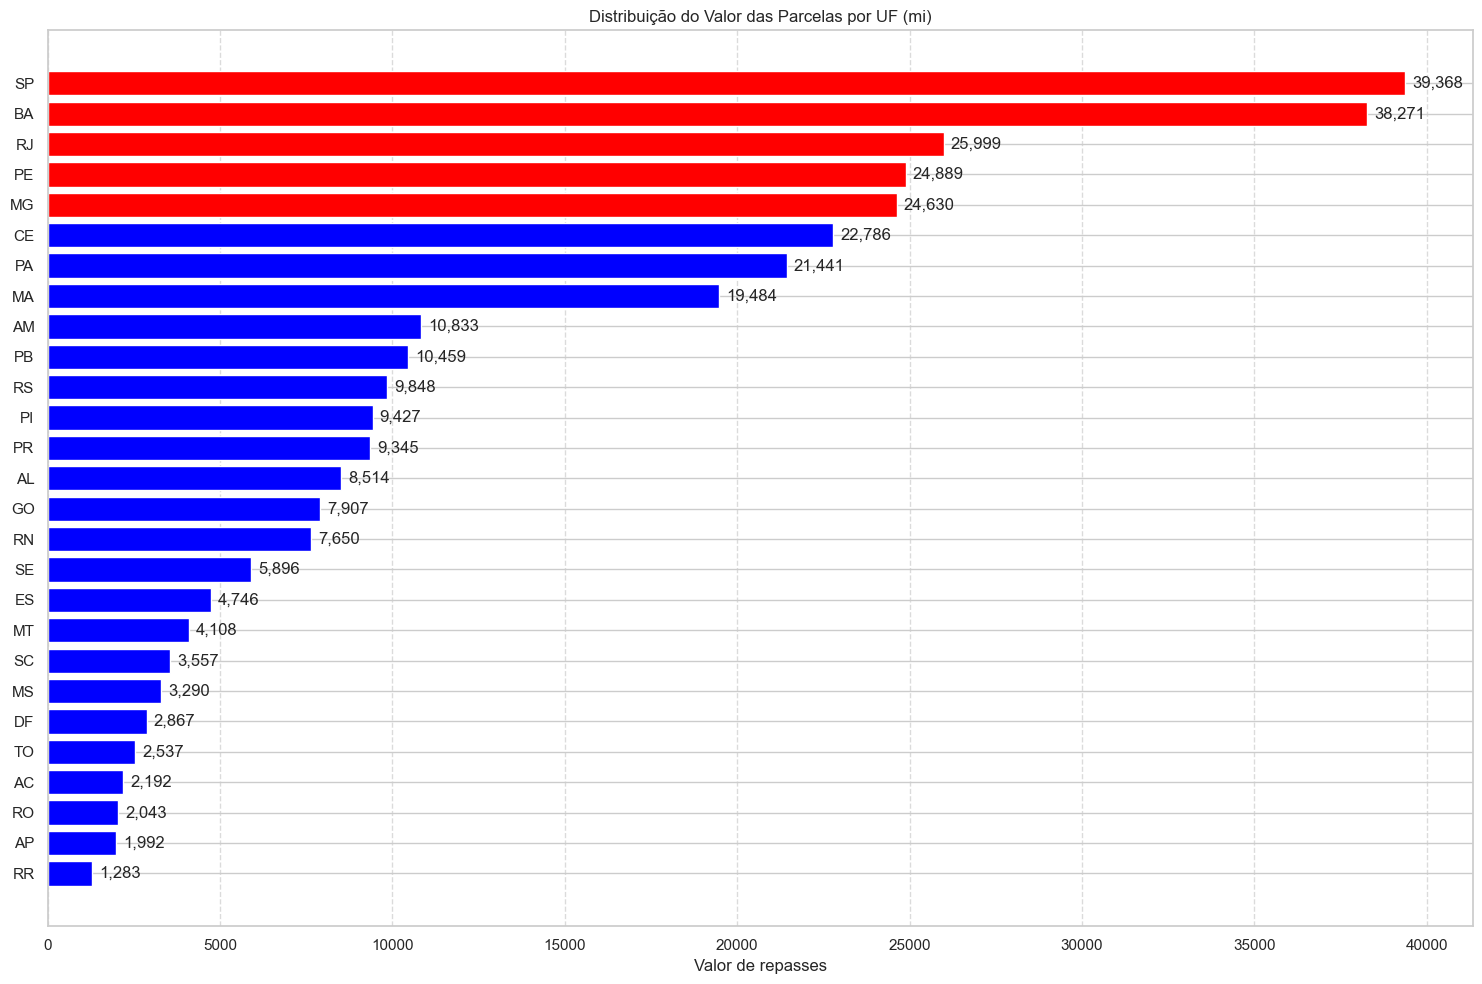

In [31]:
# plotando ranking dos estados
ranking_regiao_uf = ranking_regiao_uf.sort_values(by='valor_parcela_mi', ascending=True)

colors = ['blue'] * len(ranking_regiao_uf)
top_5 = ranking_regiao_uf.tail(5).index
for i in top_5:
    colors[ranking_regiao_uf.index.get_loc(i)] = 'red'

plt.figure(figsize=(15,10))

plt.barh(ranking_regiao_uf.uf,ranking_regiao_uf.valor_parcela_mi,color = colors)
plt.xlabel('Valor de repasses')
plt.title('Distribuição do Valor das Parcelas por UF (mi)')

for index, value in enumerate(ranking_regiao_uf.valor_parcela_mi):
    plt.text(value+200,index,f'{value:,.0f}',va = 'center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

### 💡 Insight:
Embora SP, BA e RJ liderem em volume absoluto de repasses (por terem populações maiores), estados como PE, CE e MA também se destacam, sugerindo grande presença do programa no Nordeste. Isso evidencia a amplitude nacional da política, mas com foco em regiões vulneráveis.



## Ranking regional

In [32]:
# criando uma tabela regional
dados = {
    'uf':["AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA",
        "MT", "MS", "MG", "PA", "PB", "PR", "PE", "PI", "RJ", "RN",
        "RS", "RO", "RR", "SC", "SP", "SE", "TO"],
    "Região": [
        "Norte", "Nordeste", "Norte", "Norte", "Nordeste", "Nordeste", "Centro-Oeste", "Sudeste", "Centro-Oeste", "Nordeste",
        "Centro-Oeste", "Centro-Oeste", "Sudeste", "Norte", "Nordeste", "Sul", "Nordeste", "Nordeste", "Sudeste", "Nordeste",
        "Sul", "Norte", "Norte", "Sul", "Sudeste", "Nordeste", "Norte"]    
}

tabela_estados = pd.DataFrame(dados)
display(tabela_estados)

,uf,Região
0,AC,Norte
1,AL,Nordeste
2,AP,Norte
3,AM,Norte
4,BA,Nordeste
5,CE,Nordeste
6,DF,Centro-Oeste
7,ES,Sudeste
8,GO,Centro-Oeste
9,MA,Nordeste


In [33]:
# criar um df regiao consolidando df_uf e tabela_estados

df_regiao = df_uf.merge(tabela_estados, on='uf', how='left')
display(df_regiao)

,mes_competencia,uf,qtd_parcelas,valor_parcela_mi,media_parcela,desvio_padrao,data,ano,Região
0,202303,AC,125962,85.56,679.0,157.0,2023-03-01,2023,Norte
1,202303,AL,526714,339.71,645.0,121.0,2023-03-01,2023,Nordeste
2,202303,AM,599464,403.95,674.0,141.0,2023-03-01,2023,Norte
3,202303,AP,120648,79.99,663.0,134.0,2023-03-01,2023,Norte
4,202303,BA,2488214,1574.64,633.0,110.0,2023-03-01,2023,Nordeste
...,...,...,...,...,...,...,...,...,...
643,202502,RS,636662,432.09,679.0,182.0,2025-02-01,2025,Sul
644,202502,SC,222457,147.21,662.0,223.0,2025-02-01,2025,Sul
645,202502,SE,377008,249.92,663.0,172.0,2025-02-01,2025,Nordeste
646,202502,SP,2442992,1612.88,660.0,198.0,2025-02-01,2025,Sudeste


In [34]:
# criando a tabela de ranking regional
ranking_regiao = df_regiao.groupby('Região')['valor_parcela_mi'].sum().reset_index().sort_values(by='valor_parcela_mi',ascending=False)
total = ranking_regiao['valor_parcela_mi'].sum()
ranking_regiao['percentual'] = (ranking_regiao['valor_parcela_mi']/total)*100
ranking_regiao['percentual'] = ranking_regiao['percentual'].apply(lambda x: f'{x:.2f}%')
display(ranking_regiao)

,Região,valor_parcela_mi,percentual
1,Nordeste,147377.04,45.30%
3,Sudeste,94742.34,29.12%
2,Norte,42320.50,13.01%
4,Sul,22750.41,6.99%
0,Centro-Oeste,18172.45,5.59%


Desde mar/2023 até fev/2025 a região nordeste recebeu 45,30% do total de repasses que equivale a R$ 147 bilhões. Mostra que a maior vulnerabilidade social fica na região nordeste.

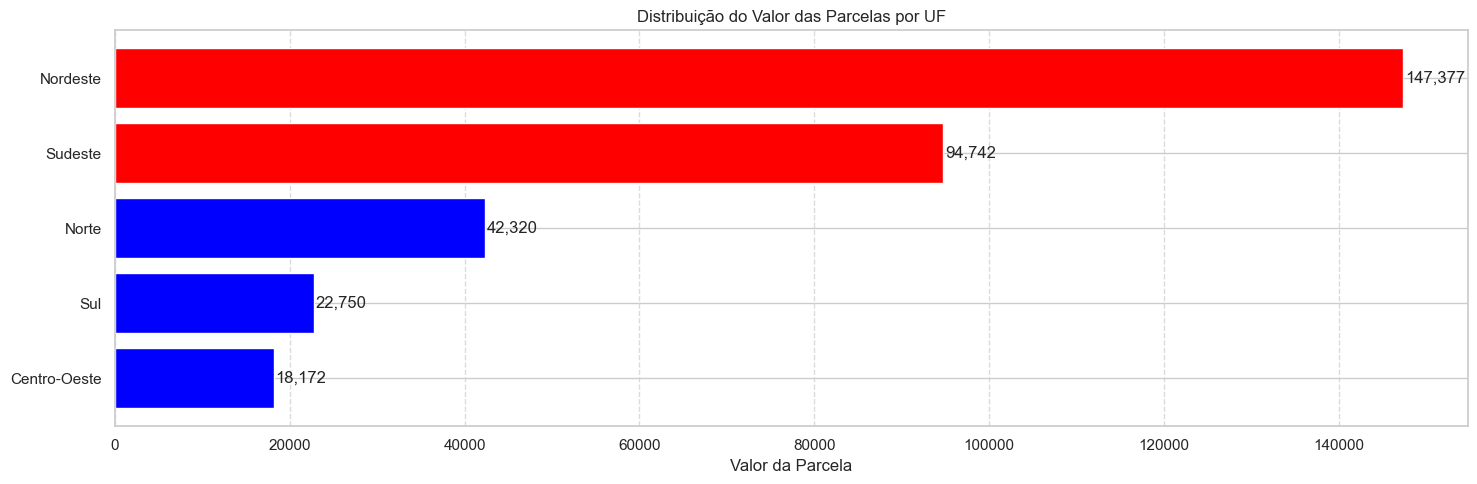

In [35]:
# plotando ranking regional
ranking_regiao = ranking_regiao.sort_values(by='valor_parcela_mi', ascending=True)

colors = ['blue'] * len(ranking_regiao)
top_5 = ranking_regiao.tail(2).index
for i in top_5:
    colors[ranking_regiao.index.get_loc(i)] = 'red'

plt.figure(figsize=(15,5))

plt.barh(ranking_regiao['Região'],ranking_regiao.valor_parcela_mi,color = colors)
plt.xlabel('Valor da Parcela')
plt.title('Distribuição do Valor das Parcelas por UF')

for index, value in enumerate(ranking_regiao.valor_parcela_mi):
    plt.text(value+200,index,f'{value:,.0f}',va = 'center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

### 💡 Insight:
Neste gráfico, observamos como os repasses do Bolsa Família estão distribuídos por região do Brasil. As regiões estão ordenadas do menor para o maior valor total recebido, com destaque (em vermelho) para as duas regiões que concentram os maiores repasses: **Nordeste** e **Sudeste**.

Essa concentração evidencia a forte presença de beneficiários nessas regiões, especialmente no Nordeste — historicamente mais dependente de programas de transferência de renda devido a fatores socioeconômicos.

O Sudeste, apesar de ser a região mais rica, também aparece com repasse alto, provavelmente devido à densidade populacional de estados como São Paulo e Rio de Janeiro.

## Repasses por habitantes

In [36]:
# lendo a base de projeção populacional fonte: IBGE
df_populacao = pd.read_excel('dados/projecao_populacao.xlsx')
df_populacao.head()

,IDADE,SEXO,CÓD.,SIGLA,LOCAL,2000,2001,2002,2003,2004,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0,Ambos,11,RO,Rondônia,32024,31694,31313,30890,30405,...,27200,26806,27429,27237,26124,25357,24833,24053,23398,22918
1,1,Ambos,11,RO,Rondônia,32122,31704,31410,31070,30679,...,27605,26986,26556,27199,27063,25957,25149,24609,23862,23224
2,2,Ambos,11,RO,Rondônia,32128,31938,31549,31270,30944,...,27276,27442,26795,26380,27060,26935,25800,24966,24458,23722
3,3,Ambos,11,RO,Rondônia,32072,31966,31791,31420,31160,...,26997,27140,27284,26648,26266,26945,26805,25651,24834,24333
4,4,Ambos,11,RO,Rondônia,32016,31909,31820,31662,31307,...,27664,26880,27007,27160,26548,26168,26826,26675,25533,24724


In [38]:
# convertendo o titulo das colunas para string 
df_populacao.columns = df_populacao.columns.astype(str)

# criando a tabela df_populacao_1
df_populacao_1 = df_populacao.groupby('SIGLA')[['2023','2024','2025']].sum()
df_populacao_1 = df_populacao_1.reset_index()

# Criando uma coluna(populacao) onde é a média dos anos(2023, 2024, 2025)
df_populacao_1['populacao'] = df_populacao_1[['2023', '2024', '2025']].mean(axis=1).round(0)
df_populacao_1['populacao'] = df_populacao_1['populacao'].apply(lambda x: f'{x:.0f}')

df_populacao_1.head()

,SIGLA,2023,2024,2025,populacao
0,AC,876582,880631,884372,880528
1,AL,3218607,3220104,3220848,3219853
2,AM,4240571,4281209,4321616,4281132
3,AP,799124,802837,806517,802826
4,BA,14828806,14850513,14870907,14850075


In [40]:
# criando tabela df_proporcao
df_proporcao = df_regiao.groupby(['uf'])[['qtd_parcelas']].mean().reset_index().sort_values(by='uf',ascending=True)
df_proporcao['qtd_parcelas'] = df_proporcao['qtd_parcelas'].apply(lambda x: f'{x:.0f}')
df_proporcao.head()

,uf,qtd_parcelas
0,AC,128903
1,AL,534600
2,AM,629818
3,AP,118668
4,BA,2462811


In [41]:
# ranking uf de população que recebe o beneficio x população informada segundo IBGE

df_prop_uf = df_proporcao.merge(df_populacao_1[['SIGLA','populacao']], left_on='uf', right_on='SIGLA', how='left')
df_prop_uf['qtd_parcelas'] = pd.to_numeric(df_prop_uf['qtd_parcelas'])
df_prop_uf['populacao'] = pd.to_numeric(df_prop_uf['populacao'])
df_prop_uf['%'] = (df_prop_uf['qtd_parcelas'] / df_prop_uf['populacao'])*100
df_prop_uf['%'] = df_prop_uf['%'].round(2)
df_prop_uf = df_prop_uf.sort_values(by='%', ascending=False)
df_prop_uf['%'] = df_prop_uf['%'].astype(str)+'%'

df_prop_uf.head(28)

,uf,qtd_parcelas,SIGLA,populacao,%
16,PI,597966,PI,3375358,17.72%
9,MA,1185720,MA,7010802,16.91%
15,PE,1600097,PE,9538506,16.78%
24,SE,380784,SE,2290832,16.62%
1,AL,534600,AL,3219853,16.6%
4,BA,2462811,BA,14850075,16.58%
14,PB,670122,PB,4144659,16.17%
5,CE,1461431,CE,9233055,15.83%
13,PA,1306694,PA,8663874,15.08%
3,AP,118668,AP,802826,14.78%


In [ ]:
# Baixar limites estaduais oficiais de 2020
mapa = geobr.read_state(year=2020)


C:\Users\alext\AppData\Local\Temp\ipykernel_99652\3864482110.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mapa_merge['coords'] = mapa_merge['geometry'].centroid


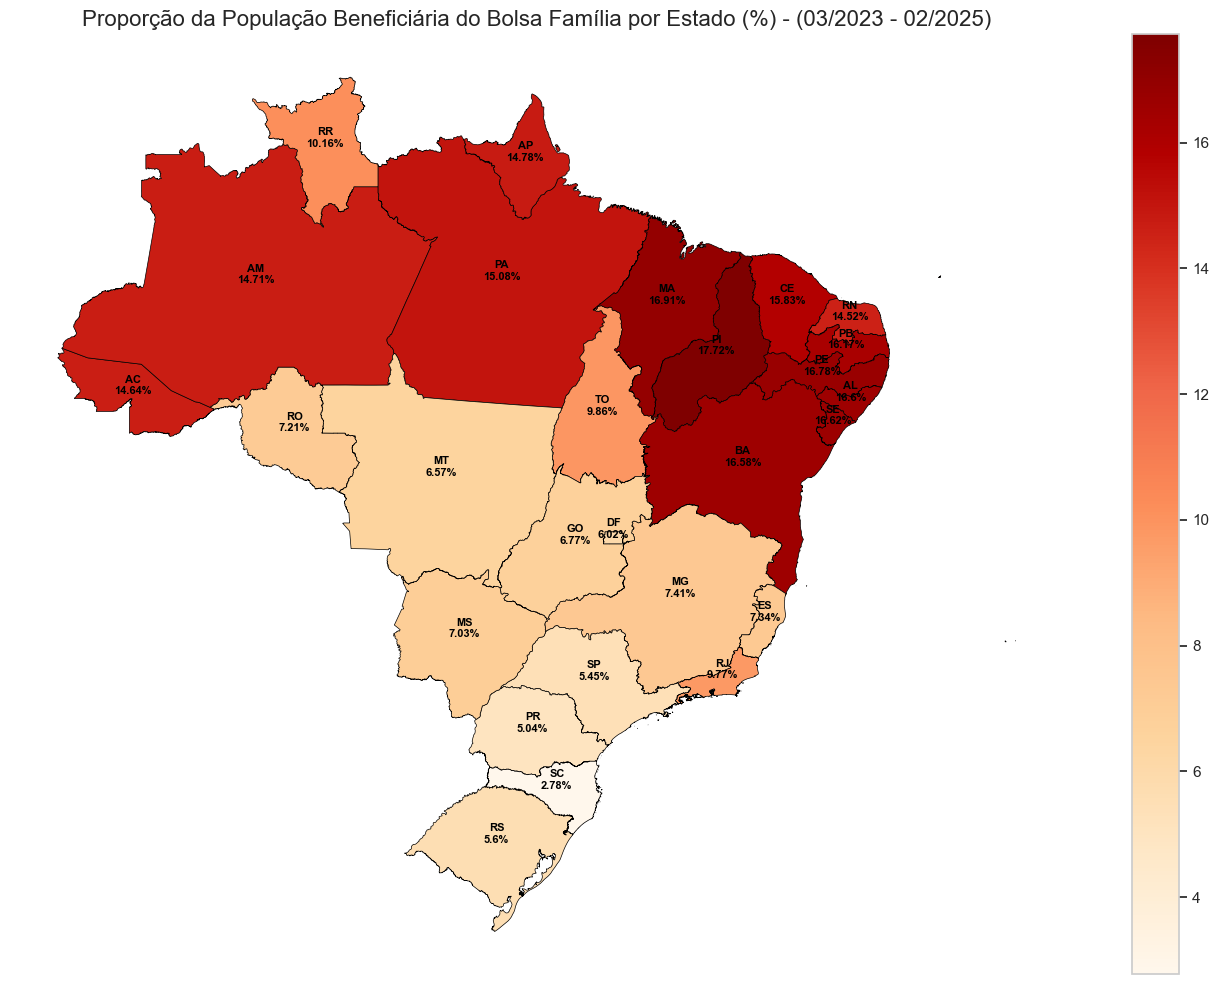

In [88]:
df_prop_uf['percentual_float'] = df_prop_uf['%'].str.replace('%', '').astype(float)

# Carregar o mapa do Brasil
mapa = geobr.read_state(year=2020)

# Merge com os dados de proporção
mapa_merge = mapa.merge(df_prop_uf, left_on='abbrev_state', right_on='uf', how='left')

# Calcular o ponto central de cada estado para posicionar o texto
mapa_merge['coords'] = mapa_merge['geometry'].centroid

# Criar figura
fig, ax = plt.subplots(figsize=(14, 10))

# Mapa colorido
mapa_merge.plot(column='percentual_float', cmap='OrRd', legend=True,
                edgecolor='black', linewidth=0.5, ax=ax)

# Adicionar textos: sigla e percentual
for idx, row in mapa_merge.iterrows():
    if pd.notnull(row['coords']):
        plt.annotate(
            text=f"{row['abbrev_state']}\n{row['%']}",
            xy=(row['coords'].x, row['coords'].y),
            ha='center', fontsize=8, weight='bold', color='black'
        )

# Ajustes finais
plt.title('Proporção da População Beneficiária do Bolsa Família por Estado (%) - (03/2023 - 02/2025)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


### 💡 Insight:
Os estados do Nordeste e Norte concentram as maiores proporções da população beneficiada, com destaque para PI, MA, AL, CE e AM — todos acima de 14%. O mapa mostra claramente o alinhamento entre vulnerabilidade e cobertura do programa, servindo como excelente argumento visual para políticas direccionadas.


In [69]:
# ranking regional população que recebe o beneficio x população informada segundo IBGE
df_ranking_regional = df_prop_uf.merge(tabela_estados,on='uf', how='left')
df_ranking_regional.head()

,uf,qtd_parcelas,SIGLA,populacao,%,percentual_float,Região
0,PI,597966,PI,3375358,17.72%,17.72,Nordeste
1,MA,1185720,MA,7010802,16.91%,16.91,Nordeste
2,PE,1600097,PE,9538506,16.78%,16.78,Nordeste
3,SE,380784,SE,2290832,16.62%,16.62,Nordeste
4,AL,534600,AL,3219853,16.6%,16.60,Nordeste


In [70]:
# criando tabela 
df_ranking_regional = df_ranking_regional.drop(columns=['%','SIGLA','uf'])
df_ranking_regional1 = df_ranking_regional.groupby('Região')[['qtd_parcelas','populacao']].sum()

# criando coluna com o percentual
df_ranking_regional1['%'] = (df_ranking_regional1['qtd_parcelas'] / df_ranking_regional1['populacao'])*100
df_ranking_regional1['%'] = df_ranking_regional1['%'].round(2)
df_ranking_regional1 = df_ranking_regional1.sort_values(by='%', ascending=False)
df_ranking_regional1['%'] = df_ranking_regional1['%'].astype(str)+'%'

df_ranking_regional1.head()

,qtd_parcelas,populacao,%
Região,,,
Nordeste,9393801,57109002,16.45%
Norte,2538395,18668580,13.6%
Sudeste,6071106,88610397,6.85%
Centro-Oeste,1132715,17069606,6.64%
Sul,1449006,31109065,4.66%


In [84]:
df_ranking_regional1.index = df_ranking_regional1.index.str.replace('Centro-Oeste', 'Centro Oeste')

df_ranking_regional1.head()

,qtd_parcelas,populacao,%,percentual_float
Região,,,,
Nordeste,9393801,57109002,16.45%,16.45
Norte,2538395,18668580,13.6%,13.60
Sudeste,6071106,88610397,6.85%,6.85
Centro Oeste,1132715,17069606,6.64%,6.64
Sul,1449006,31109065,4.66%,4.66


C:\Users\alext\AppData\Local\Temp\ipykernel_99652\1194877950.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mapa_merge['coords'] = mapa_merge.geometry.centroid


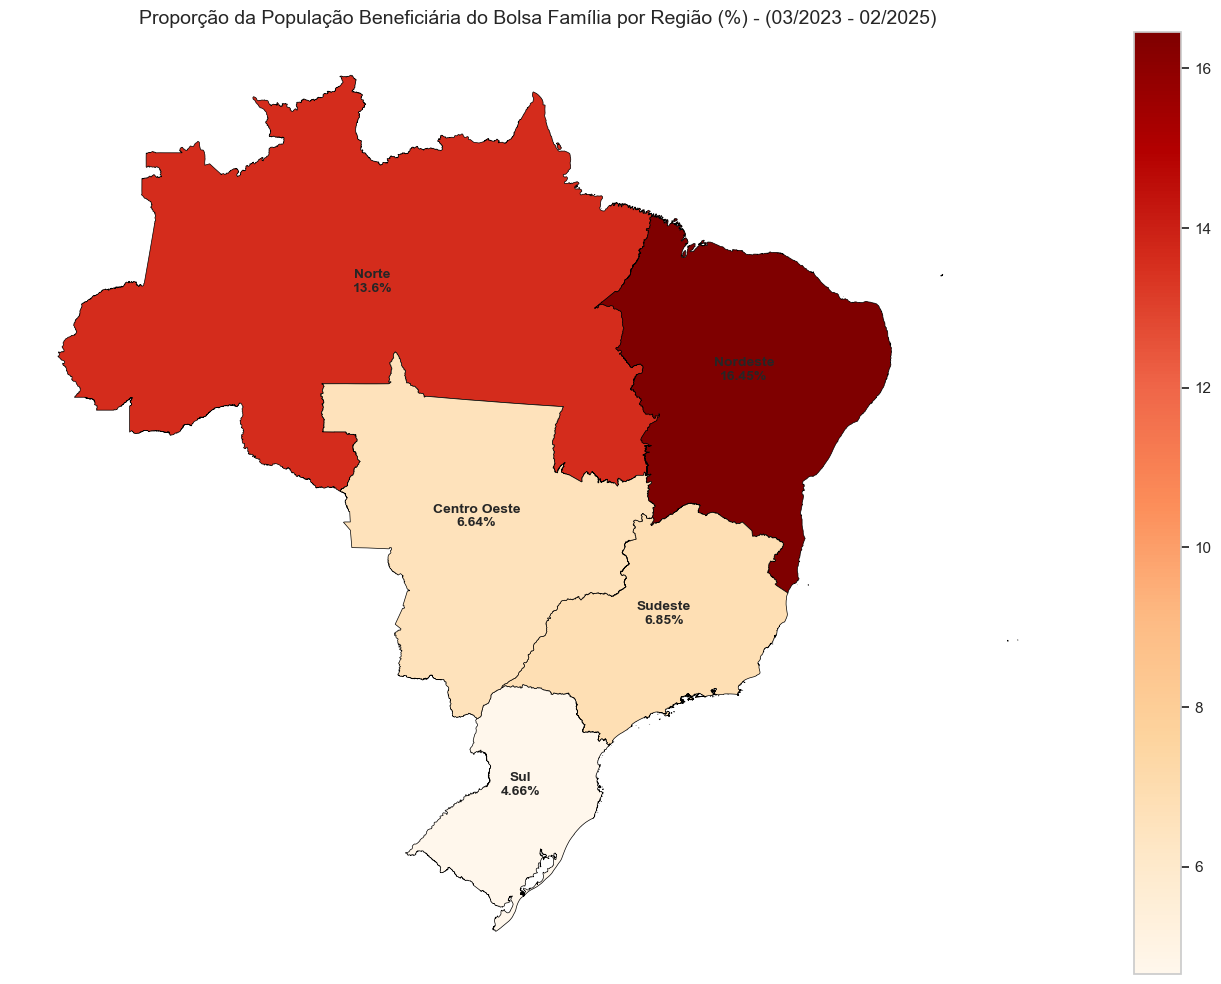

In [91]:
df_ranking_regional1['percentual_float'] = df_ranking_regional1['%'].str.replace('%', '').astype(float)

# Carregar mapa das regiões
mapa_regioes = geobr.read_region(year=2020)

# Merge: mapa com tabela
mapa_merge = mapa_regioes.merge(df_ranking_regional1, left_on='name_region', right_on='Região', how='left')


# Reprojetar para sistema métrico para cálculo de centróide
mapa_merge = mapa_merge.to_crs(epsg=4674)

# calcular centróide com precisão
mapa_merge['coords'] = mapa_merge.geometry.centroid



# Plotagem
fig, ax = plt.subplots(figsize=(14,10))
mapa_merge.plot(column='percentual_float', cmap='OrRd', legend=True,
                edgecolor='black', linewidth=0.5, ax=ax)

# Rótulos com nome da região + %
for idx, row in mapa_merge.iterrows():
    plt.annotate(
        f"{row['name_region']}\n{row['%']}",
        xy=(row['coords'].x, row['coords'].y),
        ha='center', fontsize=10, weight='bold'
    )

# Ajustes visuais
plt.title('Proporção da População Beneficiária do Bolsa Família por Região (%) - (03/2023 - 02/2025)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


### 💡 Insight:
O Nordeste tem mais de 16% da população recebendo Bolsa Família, seguido por Norte (13,6%). Já Sul, Centro-Oeste e Sudeste têm índices significativamente menores (entre 4,6% e 6,8%). Essa divisão reafirma a efetividade da focalização regional do programa.

## ✅ Conclusão Geral

A análise do Novo Bolsa Família revela uma política de transferência de renda consistente e bem distribuída no território nacional:

- Houve um **crescimento gradual nos valores transferidos** ao longo dos meses, demonstrando ampliação da cobertura ou aumento nos repasses.
- A **distribuição dos valores é estável**, com baixa dispersão estatística, o que evidencia uma execução regular e previsível do programa.
- Estados das regiões **Norte e Nordeste** concentram os maiores percentuais de beneficiários em relação à população, reforçando a presença do programa onde há maior vulnerabilidade social.
- A visualização espacial permite identificar **focos prioritários de atuação**, fornecendo subsídios relevantes para ajustes estratégicos em políticas públicas.

📌 **Conclusão**: o Novo Bolsa Família não só cumpre seu papel de assistência direta à população, como também serve como instrumento para **redução de desigualdades regionais** e pode ser monitorado com técnicas de análise de dados para uma gestão mais eficiente.

---

🔍 Projeto desenvolvido com dados públicos e ferramentas de análise de dados.  
📊 Tecnologias: Python · Pandas · GeoPandas · SQLite · Matplotlib · geobr  
👤 Autor: [Alex Teixeira Soares dos Santos]
